**Gradient Descent for Simple Linear Regression**

Hypothetical Function:  
$f(x)=\omega_0+\omega_1 x$ 

Loss Function:   
$J(\omega_0,\omega_1) = \frac{1}{2n} \sum_{i=1}^n [y_i-f(x_i)]^2$  

Partial Derivatives:   
$
\begin{aligned}
\frac{\partial f}{\partial \omega_0} &= 1 \\
\frac{\partial f}{\partial \omega_1} &= x \\
\frac{\partial J}{\partial f}        &= -\frac{1}{n} \sum_{i=1}^n [y_i-f(x_i)] \\
\frac{\partial J}{\partial \omega_0} &= \frac{\partial J}{\partial f}\frac{\partial f}{\partial \omega_0} = -\frac{1}{n} \sum_{i=1}^n [y_i-f(x_i)] \\
\frac{\partial J}{\partial \omega_1} &= \frac{\partial J}{\partial f}\frac{\partial f}{\partial \omega_1} = -\frac{1}{n} \sum_{i=1}^n [y_i-f(x_i)]x_i
\end{aligned}
$

Gradient Descent Algorithm:   
$
\begin{aligned}
\omega_{0_{i+1}} &= \omega_{0_{i}} - \alpha \frac{\partial J}{\partial \omega_0} \\
\omega_{1_{i+1}} &= \omega_{1_i} - \alpha \frac{\partial J}{\partial \omega_1}
\end{aligned}
$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set Environment
np.random.seed(0)
plt.style.use('bmh')
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1.5

**1. Exploring $J(\omega_1)$:**

In [2]:
# Synthetic Data
n = 50                                     # Data Points
x = np.linspace(-1, 1, n)                  # Independent Variable
y = 0 + 10*x + 1*np.random.normal(0, 1, n) # Dependent Variable

In [3]:
# Hypothetical Function
def f(x, ω):
    return ω * x

# Loss Function
def loss_function(ω):
    J    = (1/2) * np.mean((y - f(x, ω))**2)
    dJdω = -np.mean((y - f(x, ω)) * x)
    return [J, dJdω]

In [4]:
# Loss Curve
ω_ = np.linspace(-1, 15, 100)
J_ = np.zeros(len(ω_))

for i in range(len(ω_)):
    J_[i] = loss_function(ω_[i])[0]

In [5]:
# Gradient Descent Algorithm
epochs = 100                        # Epochs
α      = 0.5                        # Learning Rate
ω      = [np.random.uniform(-1, 1)] # Weights
J      = [loss_function(ω[0])[0]]   # Loss Function

for i in range(epochs):
    ω_i = ω[-1]                           # Last Weight
    ω_j = ω_i - α * loss_function(ω_i)[1] # Update Weight
    ω.append(ω_j)                         # Save Weight
    J.append(loss_function(ω_j)[0])       # Compute Loss Function

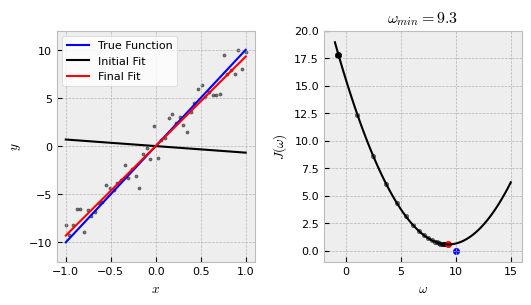

In [6]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
plt.subplots_adjust(wspace=0.35)

# Linear Regression
ax[0].scatter(x, y, color='black', s=5, alpha=0.5)
ax[0].plot(x, 10*x, color='blue', label='True Function')
ax[0].plot(x, ω[0]*x, color='black', label='Initial Fit')
ax[0].plot(x, ω[-1]*x, color='red', label='Final Fit')
ax[0].set_xlabel('$x$'); ax[0].set_xlim([-1.1, 1.1])
ax[0].set_ylabel('$y$'); ax[0].set_ylim([-12, 12])
ax[0].legend(facecolor='w')

# Loss Function
ax[1].plot(ω_, J_, color='black')
for i in range(1, epochs-1): ax[1].scatter(ω[i], J[i], color='black', s=10, alpha=0.5)
ax[1].scatter(10, 0, color='blue', s=20)
ax[1].scatter(ω[0], J[0], color='black', s=20)
ax[1].scatter(ω[-1], J[-1], color='red', s=20)
ax[1].set_title(f'$\\omega_{{min}}={ω[-1]:0.1f}$')
ax[1].set_xlim([-2, 16]);  ax[1].set_ylim([-1, 20])
ax[1].set_xlabel('$\\omega$')
ax[1].set_ylabel('$J(\\omega)$')

plt.show()

**2. Exploring $J(\omega_0, \omega_1)$:**

In [7]:
# Syinthetic Data
n = 50                                      # Data Points
x = np.linspace(-1, 1, n)                   # Independ Variable
y = 20 + 10*x + 1*np.random.normal(0, 1, n) # Depend Variable

In [8]:
# Hypothetical Function
def f(x, ω0, ω1):
    return ω0 + ω1 * x

# Loss Function
def loss_function(ω0, ω1):
    J     = (1/2) * np.mean((y - f(x, ω0, ω1))**2)
    dJdω0 = -np.mean(y - f(x, ω0, ω1))
    dJdω1 = -np.mean((y - f(x, ω0, ω1)) * x)
    return [J, dJdω0, dJdω1]

In [9]:
# Loss Curve
ω0_ = np.linspace(0, 40, 100)
ω1_ = np.linspace(-10, 30, 100)
J_  = np.zeros((len(ω0_), len(ω1_)))

for i in range(len(ω0_)):
    for j in range(len(ω1_)):
        J_[i, j] = loss_function(ω0_[i], ω1_[j])[0]

In [10]:
# Gradient Descent Algorithm
epochs = 100                               # Epochs
α = 0.5                                    # Learning Rate
ω0 = [np.random.uniform(-10, 10)]          # Weight 0 (Intercept)
ω1 = [np.random.uniform(-10, 10)]          # Weight 1 (Slope)
J  = [loss_function(ω0[0], ω1[0])[0]]      # Loss Function

for i in range(epochs):
    ω0_i = ω0[-1]                                  # Last Weight 0
    ω1_i = ω1[-1]                                  # Last Weight 1
    ω0_j = ω0_i - α * loss_function(ω0_i, ω1_i)[1] # Update Weight 0
    ω1_j = ω1_i - α * loss_function(ω0_i, ω1_i)[2] # Update Weight 1
    ω0.append(ω0_j)                                # Save Weight 0
    ω1.append(ω1_j)                                # Save Weight 1
    J.append(loss_function(ω0_j, ω1_j)[0])         # Compute Loss Function

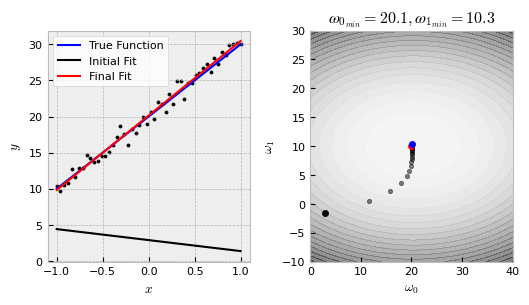

In [11]:
# PLot
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
plt.subplots_adjust(wspace=0.3)

# Linear Regression
ax[0].scatter(x, y, color='black', s=5)
ax[0].plot(x, 20+10*x, color='blue', label='True Function')
ax[0].plot(x, ω0[0]+ω1[0]*x, color='black', label='Initial Fit')
ax[0].plot(x, ω0[-1]+ω1[-1]*x, color='red', label='Final Fit')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].legend(facecolor='w')

# Loss Function
X, Y = np.meshgrid(ω0_,ω1_)
ax[1].contourf(X, Y, J_, 20, cmap='Greys', alpha=0.5)
for i in range(1, epochs-1): ax[1].scatter(ω0[i], ω1[i], color='black', s=10, alpha=0.5)
ax[1].scatter(20, 10, color='red', s=20)
ax[1].scatter(ω0[0], ω1[0], color='black', s=20)
ax[1].scatter(ω0[-1], ω1[-1], color='blue', s=20)
ax[1].set_title(f'$ω_{{0_{{min}}}}={ω0[-1]:0.1f}, ω_{{1_{{min}}}}={ω1[-1]:0.1f}$')
ax[1].set_xlabel('$\\omega_0$')
ax[1].set_ylabel('$\\omega_1$')
ax[1].grid(False)

plt.show()